In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\\Users\\manish singh\\OneDrive\\Desktop\\exl_database\\icc_wc_23_bowl.csv")

In [3]:
df=data.copy()
df.head()

,player,overs,maidens,runs,wickets,run_rate,0s,4s,6s,wd,nb,team,opponent,innings,match_id
0,Dilshan Madushanka,10.0,0,80,5,8.00,25,8,2,6,0,Sri Lanka,India,1,0
1,Dushmantha Chameera,10.0,2,71,1,7.10,28,8,2,0,0,Sri Lanka,India,1,0
2,Kasun Rajitha,9.0,0,65,0,7.22,25,7,2,1,0,Sri Lanka,India,1,0
3,Angelo Mathews,3.0,0,11,0,3.66,10,1,0,0,0,Sri Lanka,India,1,0
4,Maheesh Theekshana,10.0,0,67,0,6.70,18,5,1,1,0,Sri Lanka,India,1,0


In [4]:
df.rename(columns={'wd':'wb'},inplace=True)

In [5]:
df.head()

,player,overs,maidens,runs,wickets,run_rate,0s,4s,6s,wb,nb,team,opponent,innings,match_id
0,Dilshan Madushanka,10.0,0,80,5,8.00,25,8,2,6,0,Sri Lanka,India,1,0
1,Dushmantha Chameera,10.0,2,71,1,7.10,28,8,2,0,0,Sri Lanka,India,1,0
2,Kasun Rajitha,9.0,0,65,0,7.22,25,7,2,1,0,Sri Lanka,India,1,0
3,Angelo Mathews,3.0,0,11,0,3.66,10,1,0,0,0,Sri Lanka,India,1,0
4,Maheesh Theekshana,10.0,0,67,0,6.70,18,5,1,1,0,Sri Lanka,India,1,0


In [6]:
df.isnull().sum()

player      0
overs       0
maidens     0
runs        0
wickets     0
run_rate    0
0s          0
4s          0
6s          0
wb          0
nb          0
team        0
opponent    0
innings     0
match_id    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    574 non-null    object 
 1   overs     574 non-null    float64
 2   maidens   574 non-null    int64  
 3   runs      574 non-null    int64  
 4   wickets   574 non-null    int64  
 5   run_rate  574 non-null    float64
 6   0s        574 non-null    int64  
 7   4s        574 non-null    int64  
 8   6s        574 non-null    int64  
 9   wb        574 non-null    int64  
 10  nb        574 non-null    int64  
 11  team      574 non-null    object 
 12  opponent  574 non-null    object 
 13  innings   574 non-null    int64  
 14  match_id  574 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 67.4+ KB


In [8]:
df.describe()

,overs,maidens,runs,wickets,run_rate,0s,4s,6s,wb,nb,innings,match_id
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,7.351045,0.256098,42.322300,1.202091,5.922369,22.918118,3.900697,1.121951,1.158537,0.097561,1.480836,23.691638
std,2.685601,0.533933,19.651473,1.193757,2.135935,10.251561,2.599953,1.302075,1.535259,0.330362,0.500068,13.858070
min,0.300000,0.000000,1.000000,0.000000,1.350000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,0.000000,30.000000,0.000000,4.500000,16.000000,2.000000,0.000000,0.000000,0.000000,1.000000,12.000000
50%,8.000000,0.000000,41.000000,1.000000,5.660000,24.000000,4.000000,1.000000,1.000000,0.000000,1.000000,24.000000
75%,10.000000,0.000000,55.000000,2.000000,7.075000,30.000000,5.000000,2.000000,2.000000,0.000000,2.000000,36.000000
max,10.000000,3.000000,115.000000,7.000000,16.000000,48.000000,15.000000,6.000000,10.000000,2.000000,2.000000,47.000000


In [9]:
df.columns

Index(['player', 'overs', 'maidens', 'runs', 'wickets', 'run_rate', '0s', '4s',
       '6s', 'wb', 'nb', 'team', 'opponent', 'innings', 'match_id'],
      dtype='object')

In [10]:
player_over=df.groupby('player').agg({'overs':'sum','maidens':'sum','runs':'sum','wickets':'sum',
                            'run_rate':'mean','4s':'sum', '6s':'sum', 'wb':'sum','nb':'sum'}).sort_values(by='wickets'
                                                                                        ,ascending=False).reset_index()

In [11]:
player_over.head(10)

,player,overs,maidens,runs,wickets,run_rate,4s,6s,wb,nb
0,Mohammed Shami,48.5,4,257,24,5.138571,27,7,9,0
1,Adam Zampa,96.0,1,515,23,5.290909,33,14,9,0
2,Dilshan Madushanka,77.8,4,525,21,6.786667,63,8,23,3
3,Jasprit Bumrah,91.5,9,373,20,3.874545,38,6,22,0
4,Gerald Coetzee,63.3,1,396,20,6.442500,47,11,10,2
5,Shaheen Shah Afridi,81.0,3,481,18,5.895556,55,10,22,0
6,Marco Jansen,68.6,3,450,17,6.508889,59,10,36,5
7,Josh Hazlewood,93.1,8,449,16,4.741818,49,8,13,0
8,Mitchell Starc,87.0,2,528,16,6.082000,49,13,41,0
9,Haris Rauf,79.0,1,533,16,6.768889,50,16,18,0


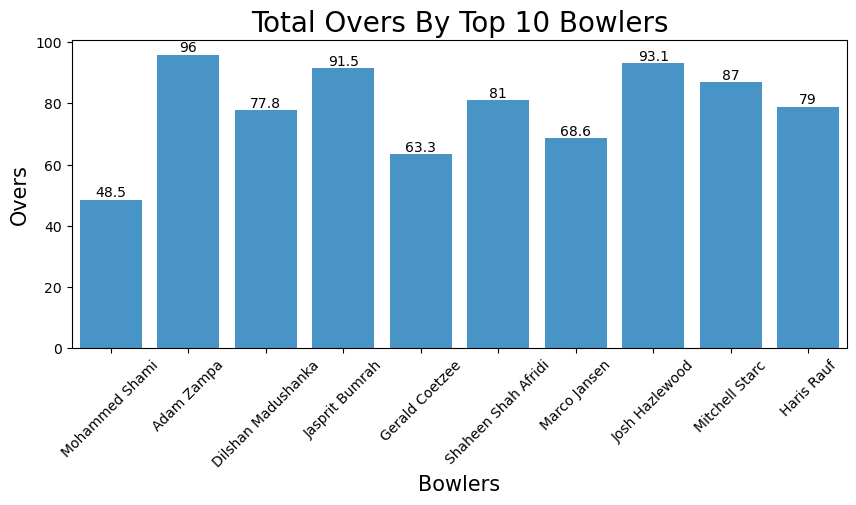

In [12]:
#Total overs by Top 10 Bowlers:

plt.figure(figsize=(10,4))
ax=sns.barplot(player_over.head(10),x='player',y='overs',color='#3498db')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=45)  
plt.title('Total Overs By Top 10 Bowlers',size=20)
plt.xlabel("Bowlers",size=15)
plt.ylabel('Overs',size=15)
plt.show()

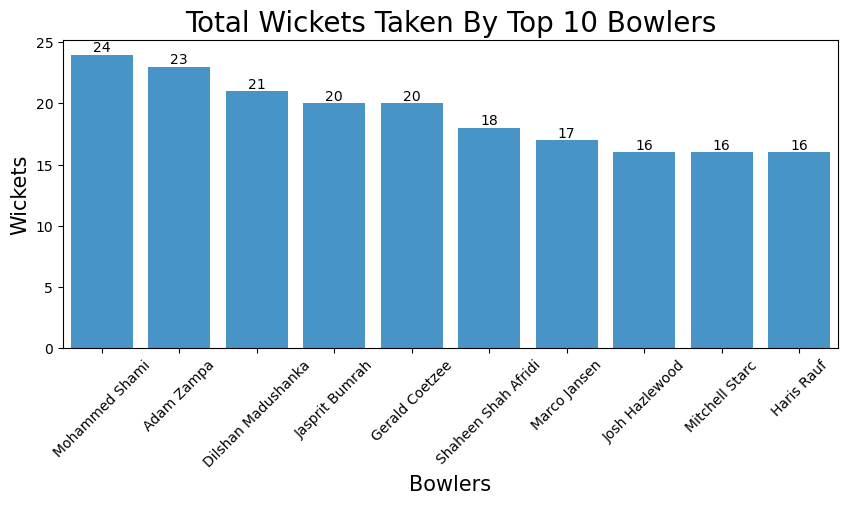

In [13]:
# Total wickets taken by top 10 Bowlers:

plt.figure(figsize=(10,4))
ax=sns.barplot(player_over.head(10),y='wickets',x='player',color='#3498db')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=45)  
plt.title('Total Wickets Taken By Top 10 Bowlers',size=20)
plt.xlabel("Bowlers",size=15)
plt.ylabel('Wickets',size=15)
plt.show()    

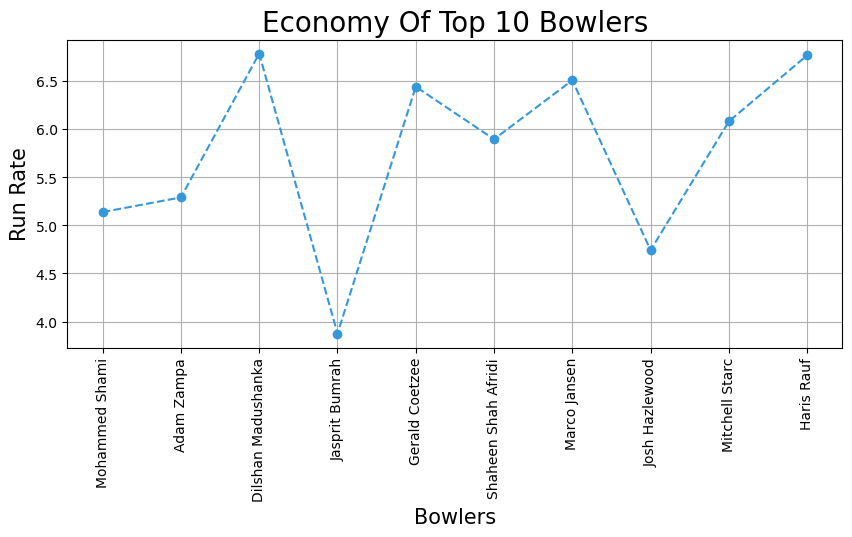

In [14]:
#Economy Of Top 10 Bowlers:

plt.figure(figsize=(10,4))
plt.plot(player_over.head(10)['player'],player_over.head(10)['run_rate'],color='#3498db',marker='o',linestyle='--')
plt.grid()
plt.xticks(rotation=90)  
plt.title('Economy Of Top 10 Bowlers',size=20)
plt.xlabel("Bowlers",size=15)
plt.ylabel('Run Rate',size=15)
plt.show() 

From the above graphs we can see that Mohammed Shami has taken the highest wickets (24) with lowest number of overs (48.5) 
and Jasprit Bumrah has the lowest economy (3.5) with 91.5 overs where as Haris Rauf has taken the lowest wickets (16) with higest economy (6.7)

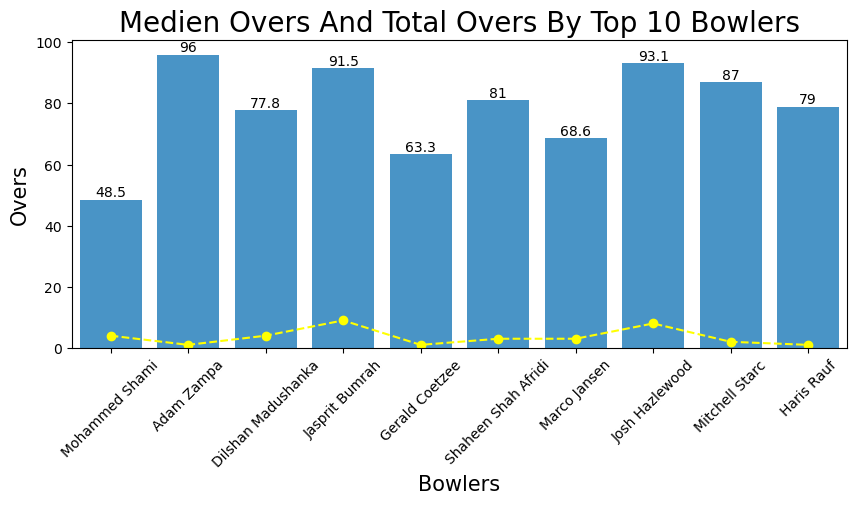

In [15]:
# Line plot for meiden overs:

plt.figure(figsize=(10,4))
lin=plt.plot(player_over.head(10)['maidens'],color='yellow',marker='o',linestyle='--')

# Bar plot for overs:    
ax=sns.barplot(player_over.head(10),x='player',y='overs',color='#3498db')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=45) 
plt.xlabel("Bowlers",size=15)
plt.ylabel("Overs",size=15)
plt.title("Medien Overs And Total Overs By Top 10 Bowlers",size=20)
plt.show()


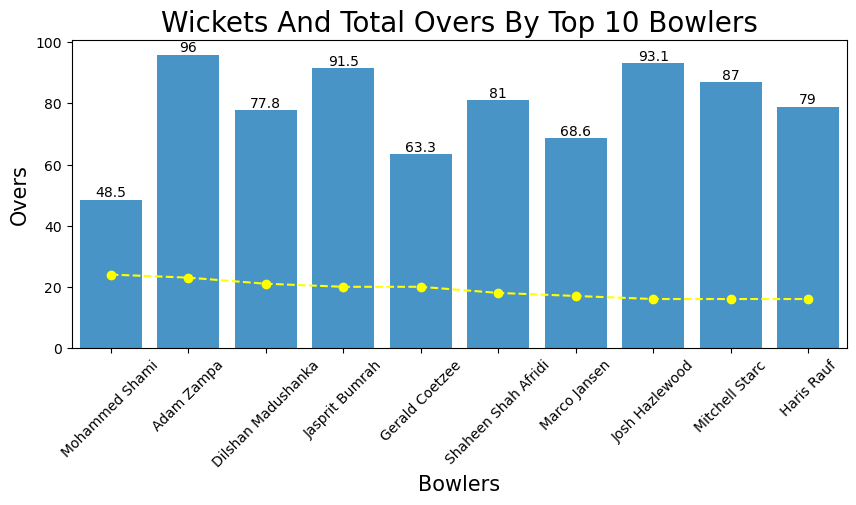

In [16]:
# Line plot for wickets overs:

plt.figure(figsize=(10,4))
lin=plt.plot(player_over.head(10)['wickets'],color='yellow',marker='o',linestyle='--')

# Bar plot for overs:    
ax=sns.barplot(player_over.head(10),x='player',y='overs',color='#3498db')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=45) 
plt.xlabel("Bowlers",size=15)
plt.ylabel("Overs",size=15)
plt.title("Wickets And Total Overs By Top 10 Bowlers",size=20)
plt.show()

From the above graphs we can see that Jasprit Bumrah has given the most medien overs (9) where as
Adam Zampa and Haris Rauf has given only one medien 

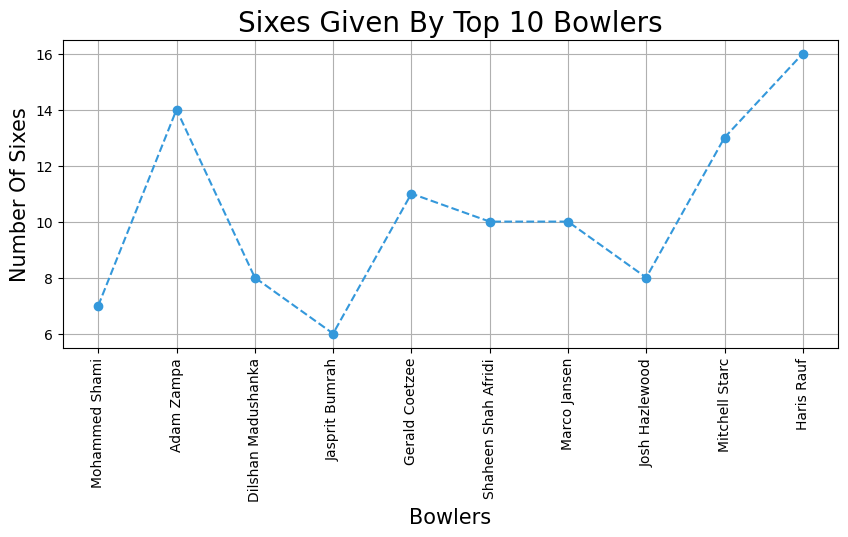

In [17]:
#Sixes Given By Top 10 Bowlers:

plt.figure(figsize=(10,4))
plt.plot(player_over.head(10)['player'],player_over.head(10)['6s'],color='#3498db',marker='o',linestyle='--')
plt.grid()
plt.title('Sixes Given By Top 10 Bowlers',size=20)
plt.xlabel('Bowlers',size=15)
plt.ylabel('Number Of Sixes',size=15)
plt.xticks(rotation=90)
plt.show()

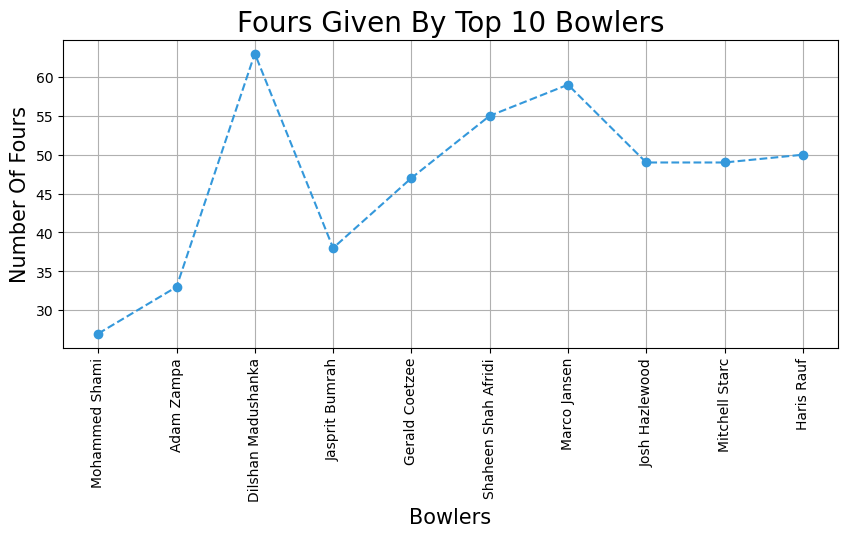

In [18]:
# Fours Given By Top 10 Bowlers:

plt.figure(figsize=(10,4))
plt.plot(player_over.head(10)['player'],player_over.head(10)['4s'],color='#3498db',marker='o',linestyle='--')
plt.grid()
plt.title('Fours Given By Top 10 Bowlers',size=20)
plt.xlabel('Bowlers',size=15)
plt.ylabel('Number Of Fours',size=15)
plt.xticks(rotation=90)
plt.show()

From the above graphs we can see that Haris Rauf has given the higest sixes (16) and Dilshan Madushanka has given the higest fours (63) where as Jasprit Bumrah has given the lowest sixes (6) and Mohammed Shami has given the lowest fours(27)

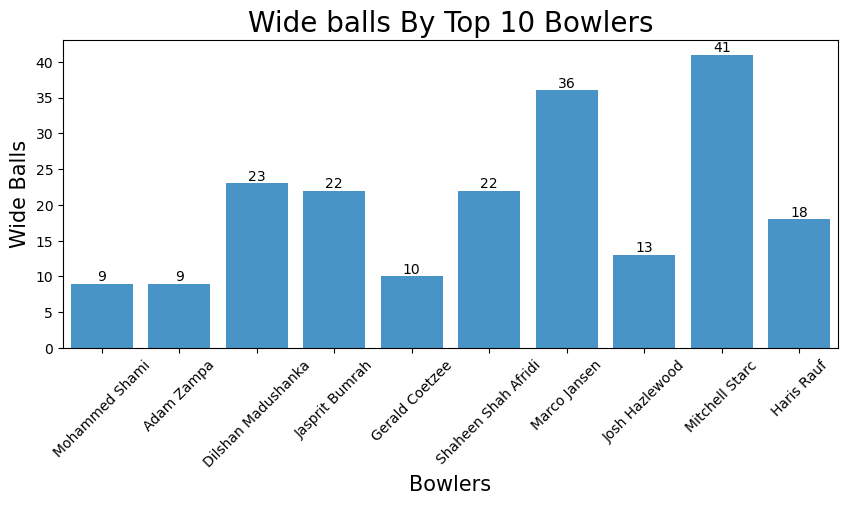

In [19]:
#Wide balls By Top 10 Bowlers:

plt.figure(figsize=(10,4))
ax=sns.barplot(player_over.head(10),x='player',y='wb',color='#3498db')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Wide balls By Top 10 Bowlers',size=20)
plt.xlabel('Bowlers',size=15)
plt.ylabel('Wide Balls',size=15)
plt.xticks(rotation=45)
plt.show()


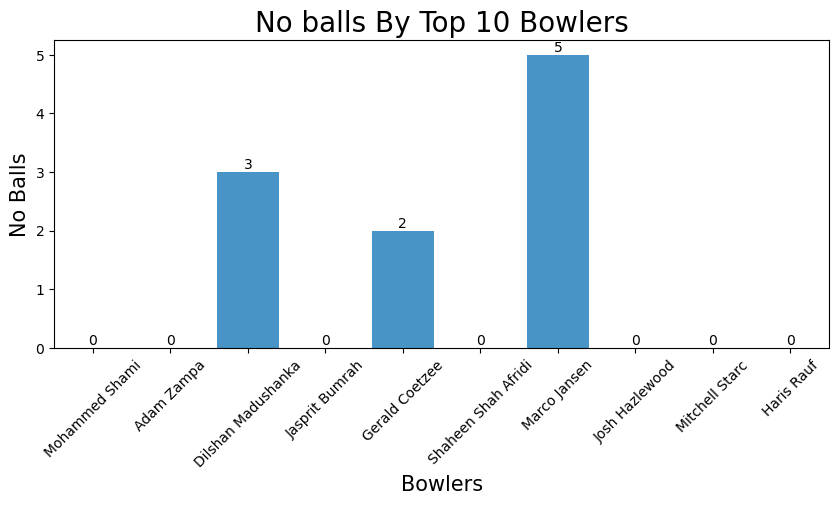

In [20]:
#No balls By Top 10 Bowlers:

plt.figure(figsize=(10,4))
ax=sns.barplot(player_over.head(10),x='player',y='nb',color='#3498db')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('No balls By Top 10 Bowlers',size=20)
plt.xlabel('Bowlers',size=15)
plt.ylabel('No Balls',size=15)
plt.xticks(rotation=45)
plt.show()

From the above graphs we can see that Mitchell Starc has given the most wide balls (41) and 
Marco jansen has given most no balls (5)

In [21]:
team_overs=df.groupby('team').agg({'overs':'sum', 'maidens':'sum', 'runs':'sum', 'wickets':'sum', 
                                    'run_rate':'mean', '4s':'sum', '6s':'sum', 'wb':'sum','nb':'sum'}).sort_values(by='wickets'
                                                                                            ,ascending=False).reset_index()

In [22]:
team_overs

,team,overs,maidens,runs,wickets,run_rate,4s,6s,wb,nb
0,India,461.4,26,2220,99,5.000469,199,52,57,3
1,South Africa,424.5,20,2324,88,5.682778,230,67,104,16
2,Australia,498.3,13,2749,86,5.516232,237,62,92,4
3,New Zealand,449.2,17,2664,71,6.237143,224,96,44,7
4,England,388.7,14,2261,65,6.068302,212,54,40,4
5,Pakistan,412.6,8,2566,65,6.286923,252,70,72,3
6,Netherlands,413.2,11,2527,62,6.202069,248,64,75,9
7,Afghanistan,399.1,13,2144,53,5.763818,184,53,58,4
8,Bangladesh,397.0,13,2414,51,6.095769,222,71,43,2
9,Sri Lanka,375.5,12,2424,50,6.606111,231,55,80,4


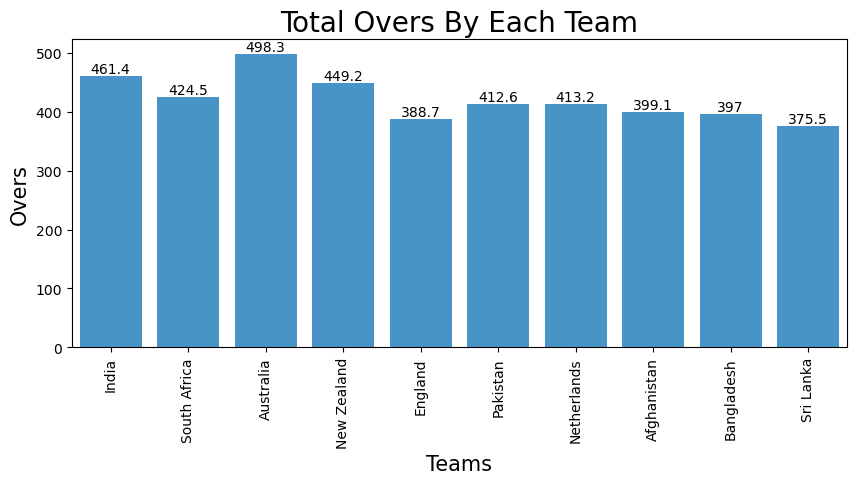

In [23]:
#Total Overs By Each Team:

plt.figure(figsize=(10,4))
ax=sns.barplot(team_overs,x='team',y='overs',color='#3498db')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Total Overs By Each Team',size=20)
plt.xlabel('Teams',size=15)
plt.ylabel('Overs',size=15)
plt.xticks(rotation=90)
plt.show()   

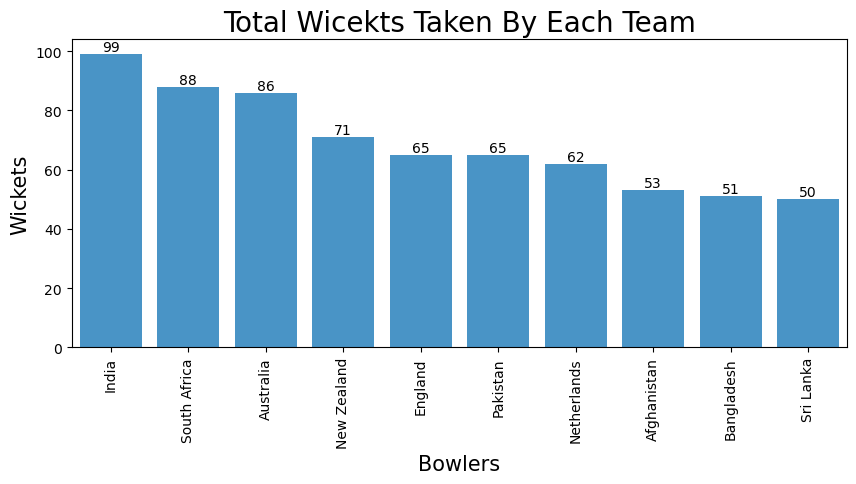

In [24]:
#Total Wicekts Taken By Each Team:

plt.figure(figsize=(10,4))
ax=sns.barplot(team_overs,x='team',y='wickets',color='#3498db')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Total Wicekts Taken By Each Team',size=20)
plt.xlabel('Bowlers',size=15)
plt.ylabel('Wickets',size=15)
plt.xticks(rotation=90)
plt.show()    

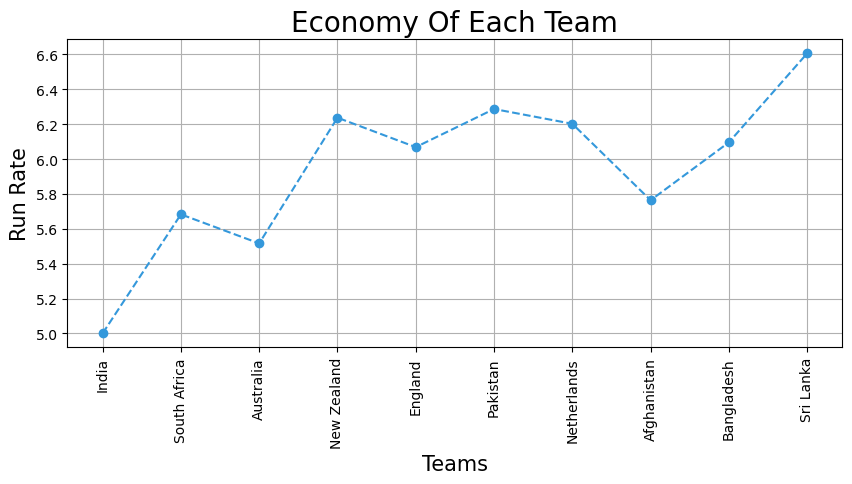

In [25]:
#Economy Of Top 10 Bowlers:

plt.figure(figsize=(10,4))
plt.plot(team_overs['team'],team_overs['run_rate'],color='#3498db',marker='o',linestyle='--')
plt.grid()
plt.xticks(rotation=90)  
plt.title('Economy Of Each Team',size=20)
plt.xlabel("Teams",size=15)
plt.ylabel('Run Rate',size=15)
plt.show()

From the above graphs we can see that team India has taken the highest wickets (99) with lowest economy (5.0) where as team Sri Lanka has taken the lowest wickets (50) with higest economy (6.6)

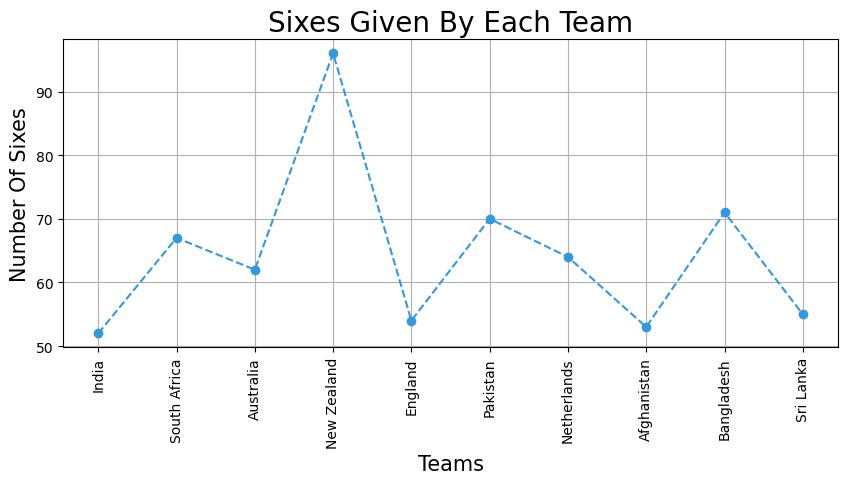

In [26]:
# Sixes Given By Each Team:

plt.figure(figsize=(10,4))
plt.plot(team_overs.head(10)['team'],team_overs.head(10)['6s'],marker='o',linestyle='--',color='#3498db')
plt.grid()
plt.xticks(rotation=90)
plt.title('Sixes Given By Each Team',size=20)
plt.xlabel('Teams',size=15)
plt.ylabel('Number Of Sixes',size=15)
plt.show()

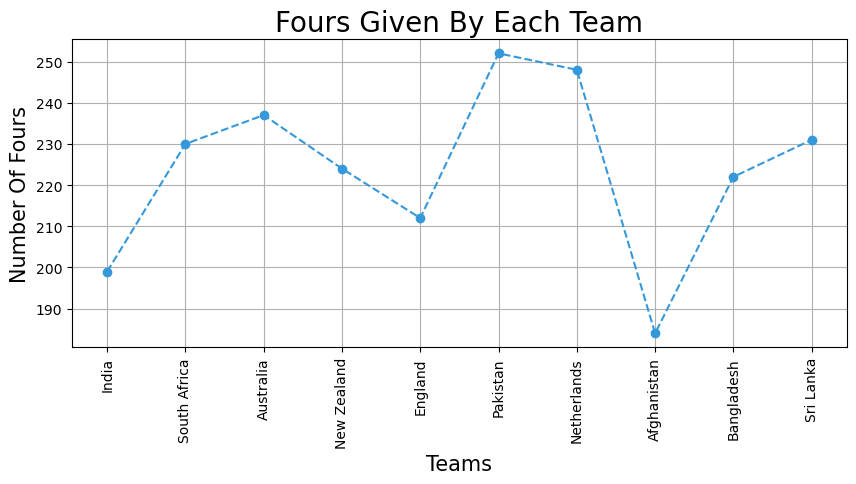

In [27]:
# Fours Given By Each Team:

plt.figure(figsize=(10,4))
plt.plot(team_overs.head(10)['team'],team_overs.head(10)['4s'],marker='o',linestyle='--',color='#3498db')
plt.grid()
plt.xticks(rotation=90)
plt.title('Fours Given By Each Team',size=20)
plt.xlabel('Teams',size=15)
plt.ylabel('Number Of Fours',size=15)
plt.show()

From the above graphs we can see that team New Zealand has given the higest sixs (96) and team Pakistan has given the higest fours (252) and team India and Afghanistan has given the lowest sixs and fours

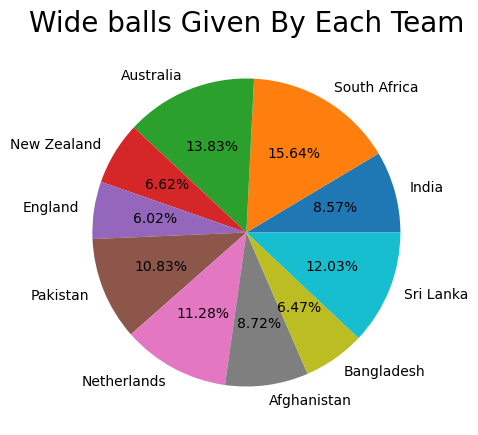

In [28]:
# Wide balls Given By Each Team:

plt.figure(figsize=(10,5))
plt.pie(team_overs['wb'], labels=team_overs['team'],autopct='%1.2f%%')
plt.title('Wide balls Given By Each Team',size=20)
plt.show()

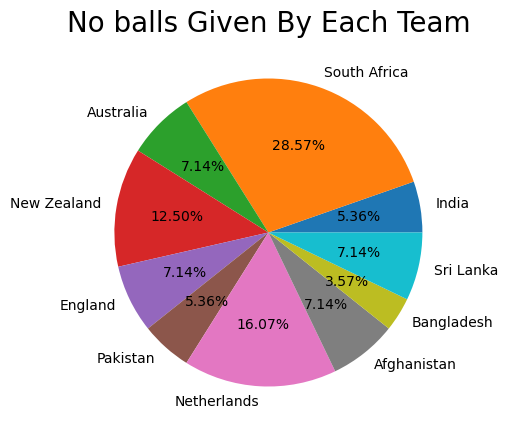

In [29]:
# No balls Given By Each Team:

plt.figure(figsize=(10,5))
plt.pie(team_overs['nb'], labels=team_overs['team'],autopct='%1.2f%%')
plt.title('No balls Given By Each Team',size=20)
plt.show()

From the above graphs we can see that team South Africa has given the most wide balls (15.64%) and most no balls (28.57%) where as
team Bangladesh has given the lowest wide (6.47%) and no balls (3.57%)

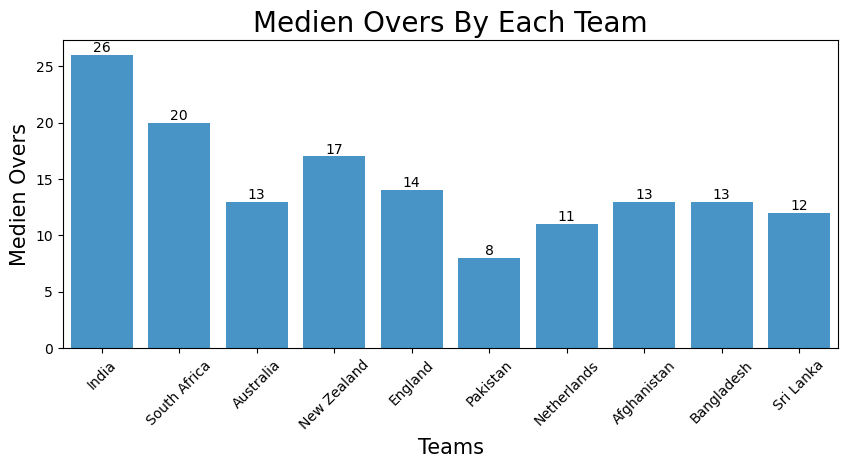

In [30]:
# Medien Overs By Each Team:

plt.figure(figsize=(10,4))
ax=sns.barplot(team_overs,x='team',y='maidens',color='#3498db')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=45) 
plt.xlabel("Teams",size=15)
plt.ylabel("Medien Overs",size=15)
plt.title("Medien Overs By Each Team",size=20)
plt.show()

Team India has given the most medien overs (26) and team Pakistan has given the lowest medien (8)

# Conclusion:

From the above data and graphs we analysis that Indian bowlers performed the best in the World cup 2024. They have the highest wickets (99) with lowest bowling economy (5.0) 
and also has highest medien overs (26) and given the second lowest number of boundaries (4s=199 and 6s=52). Where as Sri Lankan bowlers performed the worst and has only 50 wickets wiht highest economy (6.6)